# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [59]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
df_hh_income.shape
df_pct_completed_hs.shape
df_pct_completed_hs.shape
df_share_race_city.shape
df_fatalities.shape

(2535, 14)

In [5]:
df_fatalities.columns
df_pct_completed_hs.columns
df_pct_completed_hs.columns
df_share_race_city.columns
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [5]:
df_fatalities.isna().sum()
df_hh_income.isna().sum()
df_pct_completed_hs.isna().sum()
df_pct_completed_hs.isna().sum()
df_share_race_city.isna().sum()
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
import matplotlib.pyplot as plt
df_fatalities['armed'] = df_fatalities['armed'].fillna(0)
df_fatalities['race'] = df_fatalities['race'].fillna(0)
df_fatalities['flee'] = df_fatalities['flee'].fillna(0)
df_fatalities['age'] = df_fatalities['age'].fillna(0)
df_fatalities.isnull().sum()
df_pct_poverty.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

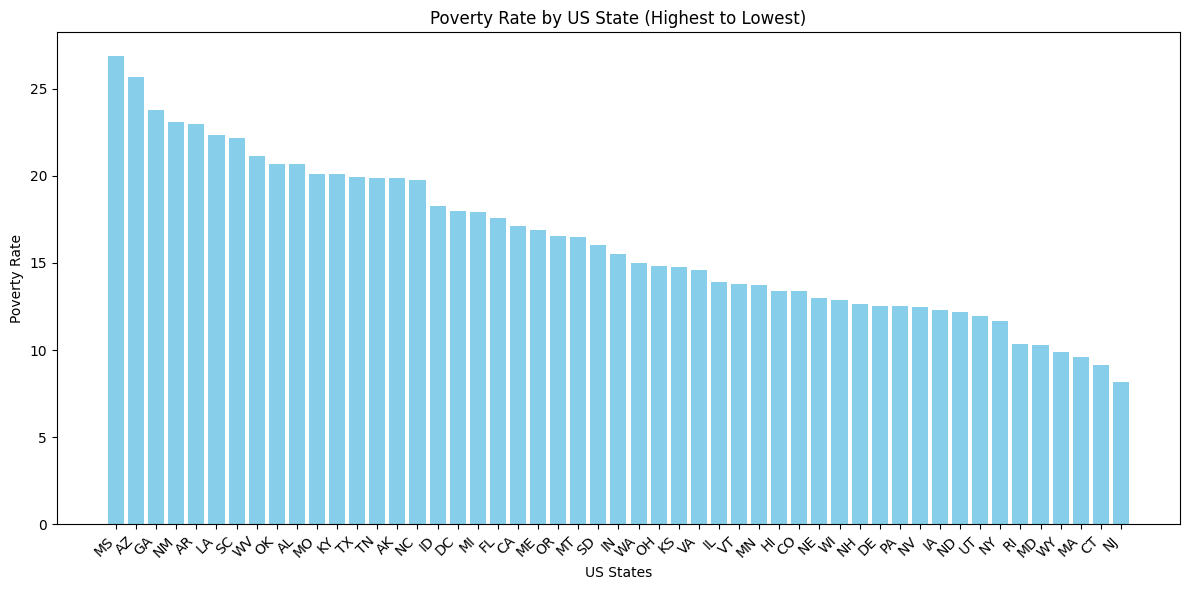

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty = df_pct_poverty.dropna(subset=['poverty_rate'])
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
state_poverty_sorted = state_poverty.sort_values(by='poverty_rate', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(state_poverty_sorted['Geographic Area'], state_poverty_sorted['poverty_rate'], color='skyblue')
plt.xlabel('US States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate by US State (Highest to Lowest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
highest_poverty_state = state_poverty_sorted.iloc[0]
lowest_poverty_state = state_poverty_sorted.iloc[-1]


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

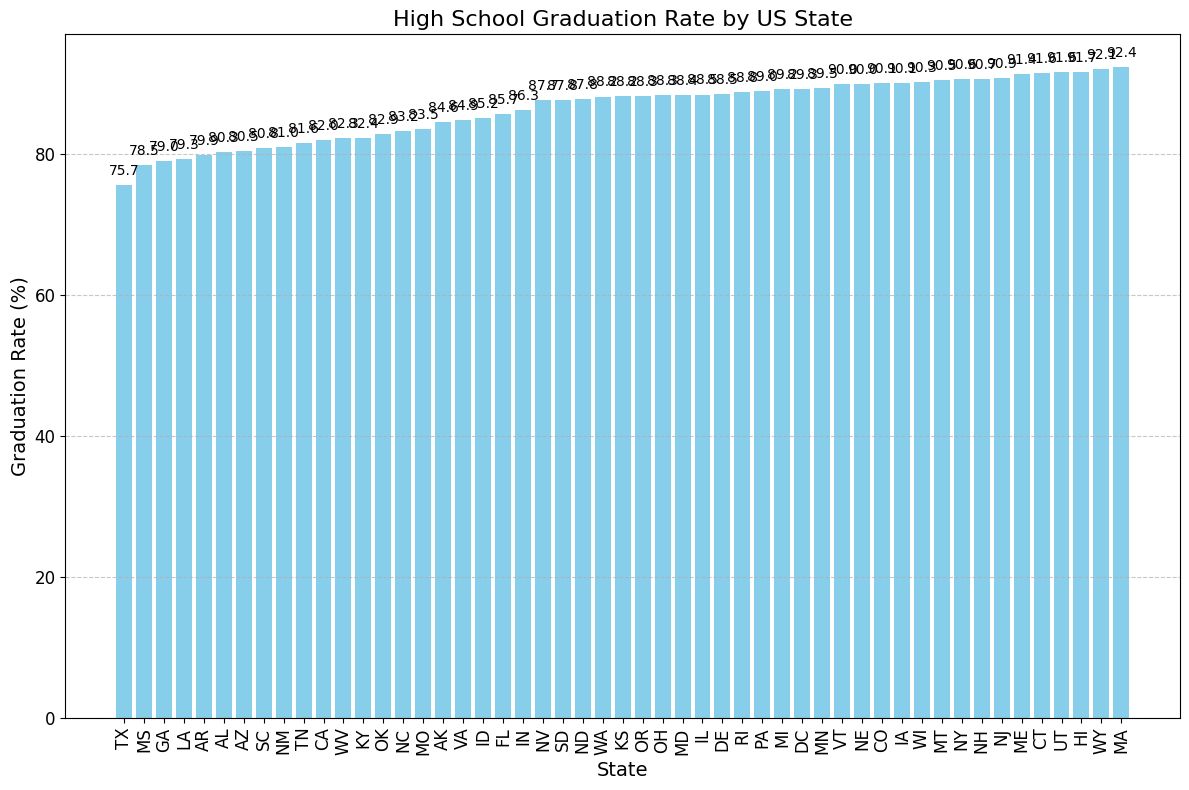

(Geographic Area           TX
 percent_completed_hs   75.69
 Name: 43, dtype: object,
 Geographic Area           MA
 percent_completed_hs   92.40
 Name: 19, dtype: object)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

state_graduation_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

state_graduation_rate_sorted = state_graduation_rate.sort_values(by='percent_completed_hs', ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.bar(state_graduation_rate_sorted['Geographic Area'], state_graduation_rate_sorted['percent_completed_hs'], color='skyblue')


plt.xlabel('State', fontsize=14)
plt.ylabel('Graduation Rate (%)', fontsize=14)
plt.title('High School Graduation Rate by US State', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 1), ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()


lowest_state = state_graduation_rate_sorted.iloc[0]
highest_state = state_graduation_rate_sorted.iloc[-1]

lowest_state, highest_state


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

C:\Users\hp\AppData\Local\Temp\ipykernel_8536\3282438417.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_data_sorted['Geographic Area'], rotation=45, ha='right')


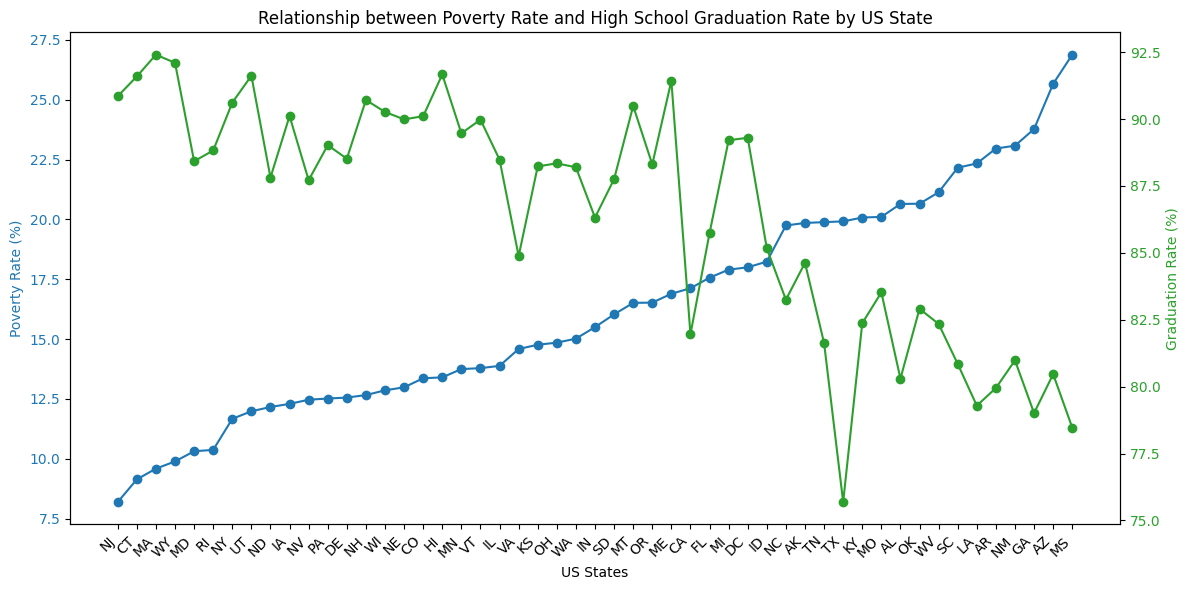

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty = df_pct_poverty.dropna(subset=['poverty_rate'])
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()


df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
state_graduation_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()


merged_data = pd.merge(state_poverty, state_graduation_rate, on='Geographic Area')

merged_data_sorted = merged_data.sort_values(by='poverty_rate', ascending=True)

fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.set_xlabel('US States')
ax1.set_ylabel('Poverty Rate (%)', color='tab:blue')
ax1.plot(merged_data_sorted['Geographic Area'], merged_data_sorted['poverty_rate'], color='tab:blue', label='Poverty Rate', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(merged_data_sorted['Geographic Area'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.set_ylabel('Graduation Rate (%)', color='tab:green')
ax2.plot(merged_data_sorted['Geographic Area'], merged_data_sorted['percent_completed_hs'], color='tab:green', label='Graduation Rate', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')


plt.title('Relationship between Poverty Rate and High School Graduation Rate by US State')
plt.tight_layout()


plt.show()


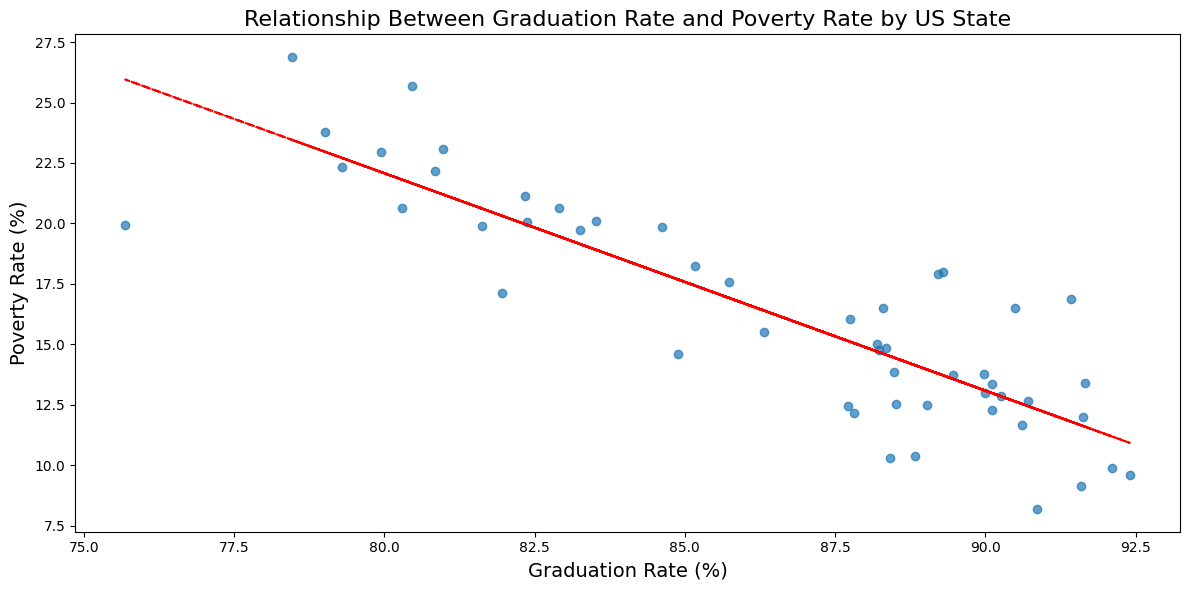

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty = df_pct_poverty.dropna(subset=['poverty_rate'])
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
state_graduation_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

merged_data = pd.merge(state_poverty, state_graduation_rate, on='Geographic Area')

plt.figure(figsize=(12, 6))
plt.scatter(merged_data['percent_completed_hs'], merged_data['poverty_rate'], color='tab:blue', alpha=0.7)


plt.xlabel('Graduation Rate (%)', fontsize=14)
plt.ylabel('Poverty Rate (%)', fontsize=14)
plt.title('Relationship Between Graduation Rate and Poverty Rate by US State', fontsize=16)

import numpy as np
slope, intercept = np.polyfit(merged_data['percent_completed_hs'], merged_data['poverty_rate'], 1)
plt.plot(merged_data['percent_completed_hs'], slope * merged_data['percent_completed_hs'] + intercept, color='red', linestyle='--')

plt.tight_layout()
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

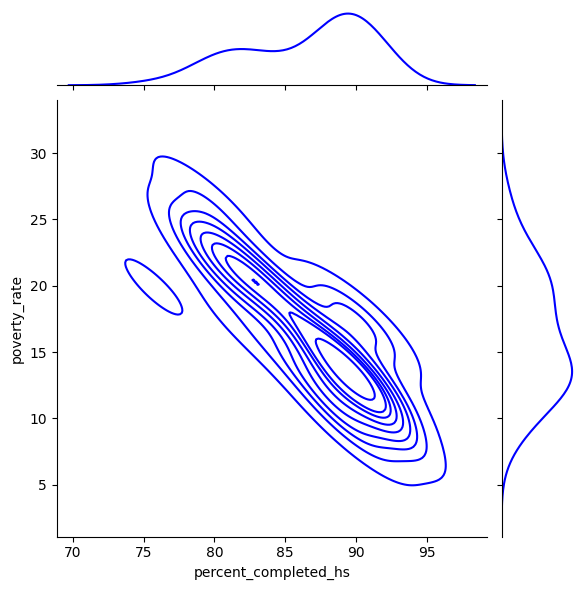

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty = df_pct_poverty.dropna(subset=['poverty_rate'])
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
state_graduation_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

merged_data = pd.merge(state_poverty, state_graduation_rate, on='Geographic Area')

sns.jointplot(data=merged_data, x='percent_completed_hs', y='poverty_rate', kind='kde', color='blue')

plt.show()


In [ ]:
#Inverse Relationship:

# There is a clear inverse relationship between high school completion rates and poverty rates. As the percentage of people who have completed high school increases, the poverty rate tends to decrease.
# This suggests that higher education levels (measured by high school completion) may be associated with lower poverty levels.
# Concentration of Data:

# Most of the data points are concentrated where high school completion rates are between 80% and 90%, and poverty rates are between 10% and 20%. This indicates that the majority of the population in the dataset falls within these ranges.
# Implications for Policy and Intervention:

# This insight can inform policy decisions: improving high school completion rates might be an effective strategy to reduce poverty.
# If the inverse relationship is causal, then investing in education and ensuring more people complete high school could potentially lead to a decrease in poverty rates.
# Outliers or Anomalies:

# The smaller, separate contour on the left side of the plot suggests a distinct group with lower high school completion (around 75%) but higher poverty (around 20%). This could represent specific regions, communities, or demographic groups with lower educational attainment and higher poverty levels. Identifying these groups could help target interventions.

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

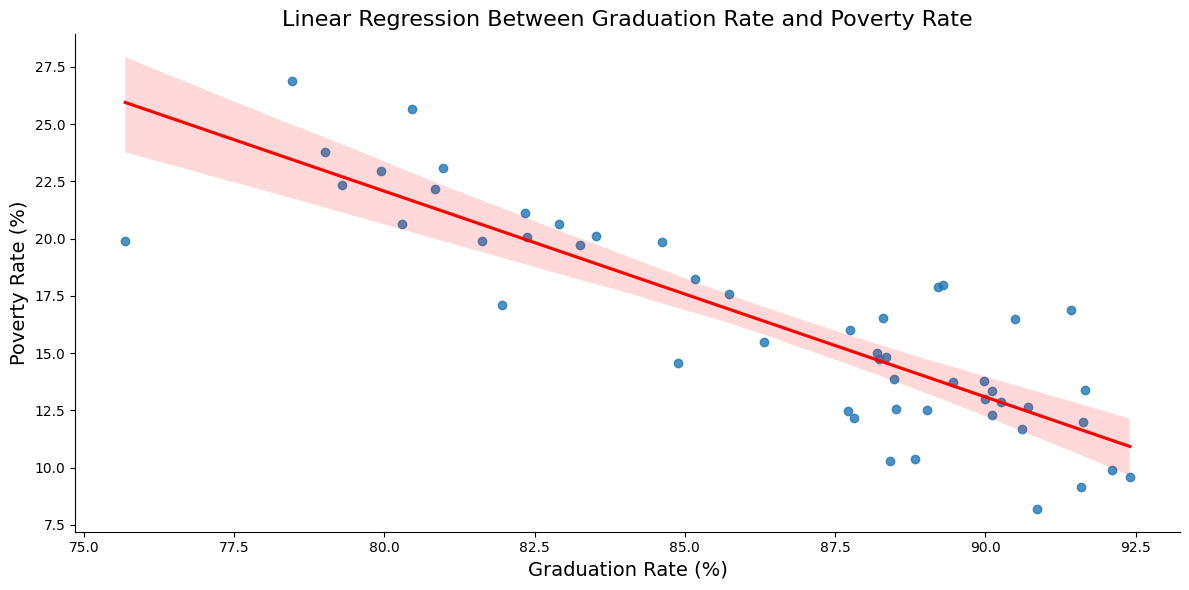

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty = df_pct_poverty.dropna(subset=['poverty_rate'])
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
state_graduation_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

merged_data = pd.merge(state_poverty, state_graduation_rate, on='Geographic Area')

sns.lmplot(data=merged_data, x='percent_completed_hs', y='poverty_rate', aspect=2, height=6, line_kws={'color': 'red'})

plt.xlabel('Graduation Rate (%)', fontsize=14)
plt.ylabel('Poverty Rate (%)', fontsize=14)
plt.title('Linear Regression Between Graduation Rate and Poverty Rate', fontsize=16)

plt.tight_layout()
plt.show()
# Regression Line (Red Line):

# The red line is the line of best fit from a linear regression model, representing the overall trend in the data.
# The slope of the line is negative, confirming an inverse relationship between graduation rate and poverty rate.
# This means that, in general, higher graduation rates are associated with lower poverty rates.



# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

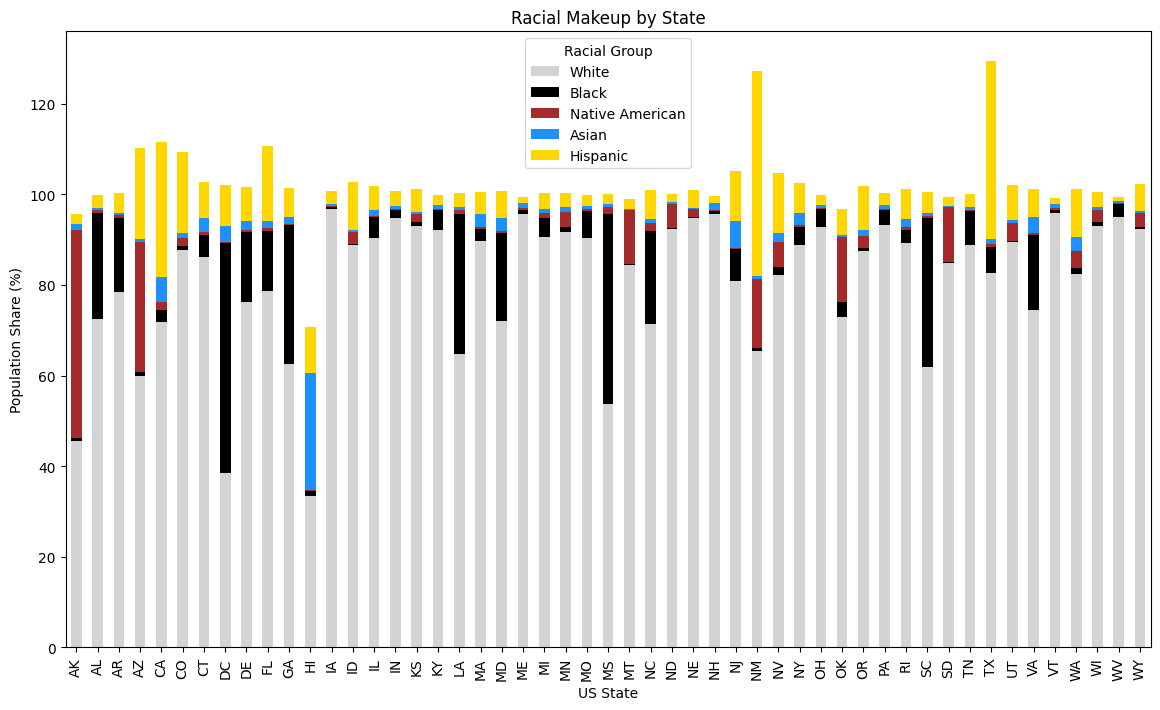

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("Share_of_Race_By_City.csv")


racial_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df[racial_columns] = df[racial_columns].apply(pd.to_numeric, errors='coerce')


state_data = df.groupby('Geographic area')[racial_columns].mean()

state_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#D3D3D3', '#000000', '#A52A2A', '#1E90FF', '#FFD700'])
plt.title('Racial Makeup by State')
plt.xlabel('US State')
plt.ylabel('Population Share (%)')
plt.legend(title='Racial Group', labels=['White', 'Black', 'Native American', 'Asian', 'Hispanic'])
plt.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [36]:
print(df.dtypes)


Geographic area          object
City                     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object


In [39]:
df[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'])
df.fillna(0, inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_8536\3578585827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')


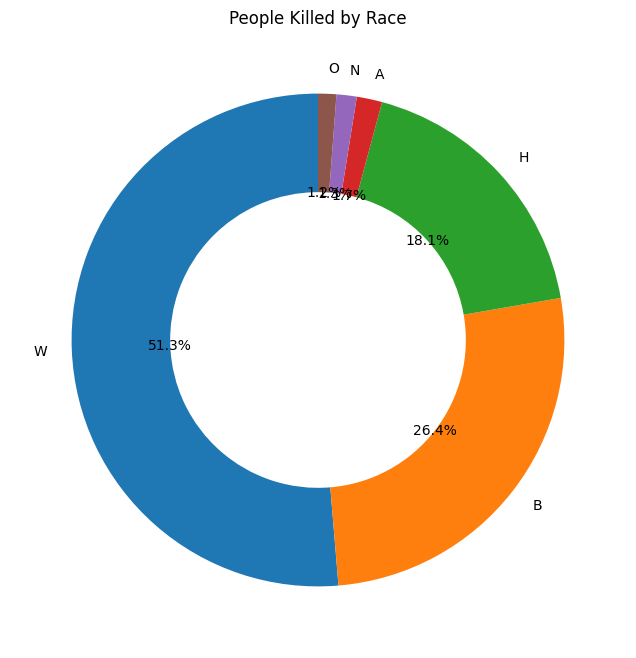

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Deaths_by_Police_US.csv')


race_counts = df['race'].value_counts()


fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})

ax.set_title('People Killed by Race')

plt.show()


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

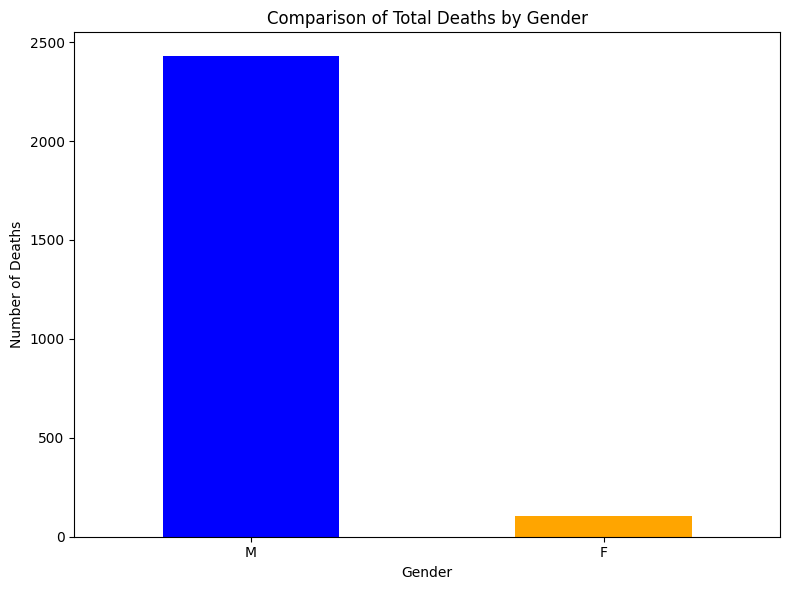

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


df_fatalities = pd.read_csv('Deaths_by_Police_US.csv')

gender_counts = df_fatalities['gender'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
gender_counts.plot(kind='bar', ax=ax, color=['blue', 'orange'])

ax.set_title('Comparison of Total Deaths by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Deaths')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

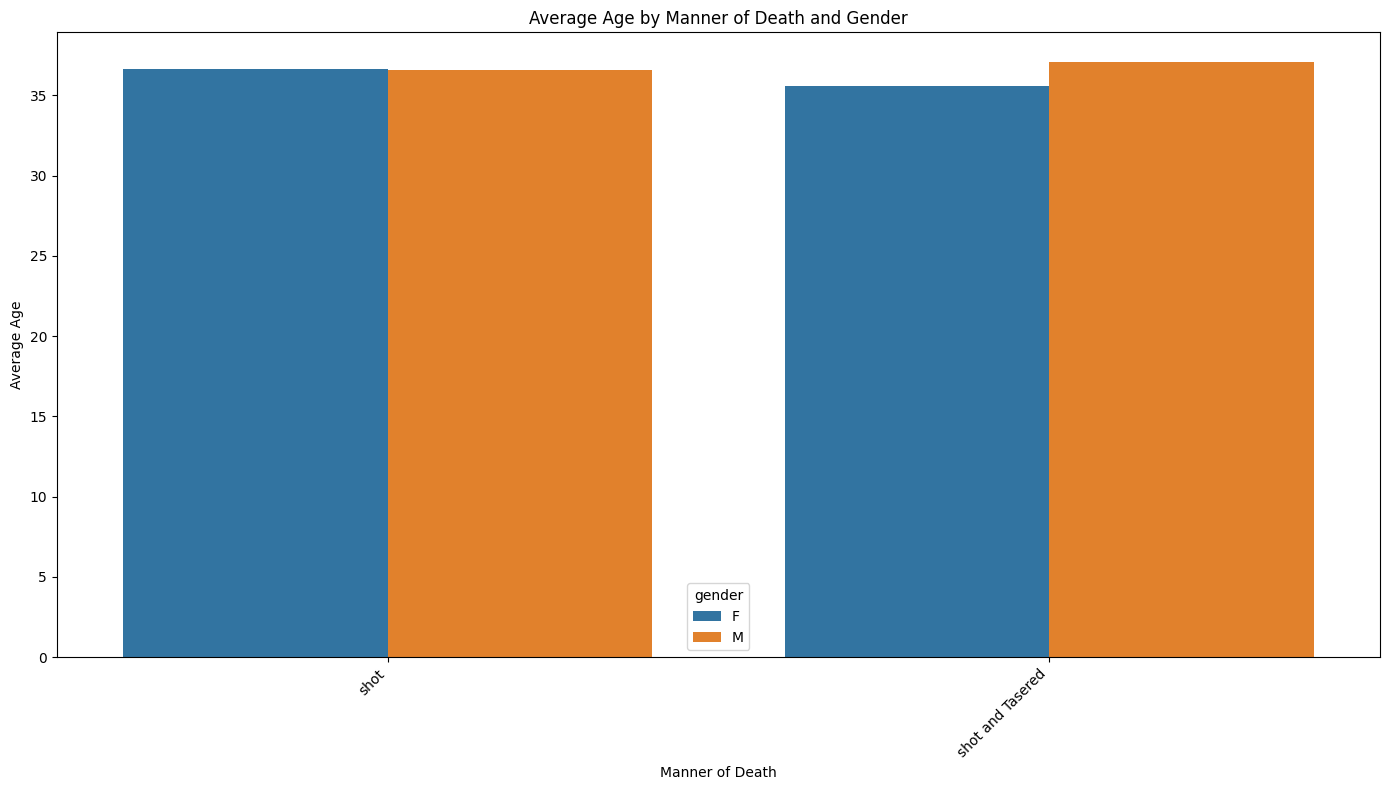

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df_fatalities = pd.read_csv('Deaths_by_Police_US.csv')

df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

age_by_manner_gender = df_fatalities.groupby(['manner_of_death', 'gender'])['age'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=age_by_manner_gender, x='manner_of_death', y='age', hue='gender')

plt.title('Average Age by Manner of Death and Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Average Age')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

Percentage of people armed: 93.25%
Percentage of people unarmed: 6.75%


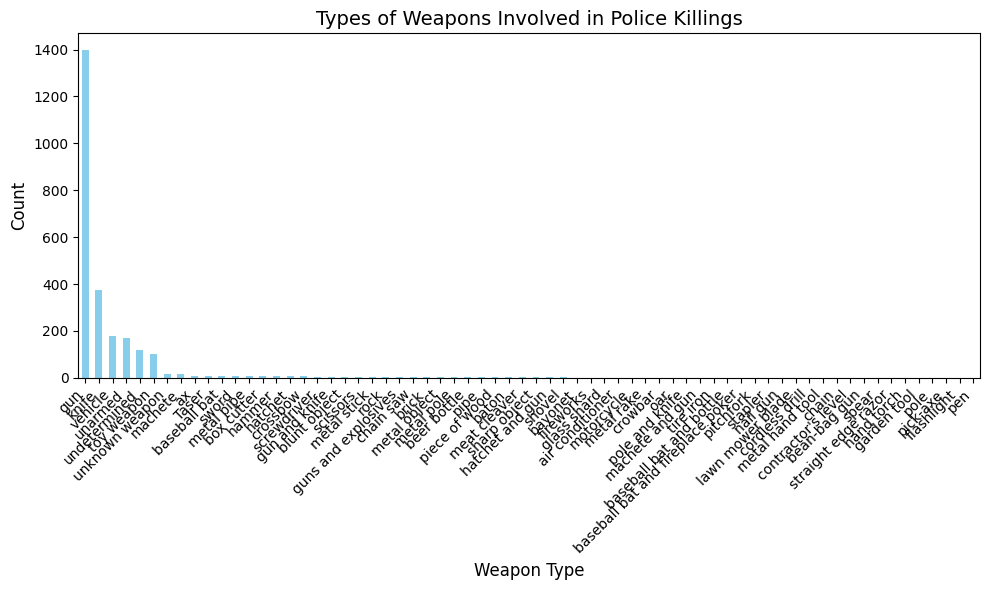

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from the CSV file
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv')


# Calculate the total number of incidents
total_incidents = len(df_fatalities)

# Calculate the number of people armed vs unarmed
armed_count = df_fatalities[df_fatalities['armed'] != 'unarmed'].shape[0]
unarmed_count = df_fatalities[df_fatalities['armed'] == 'unarmed'].shape[0]

# Calculate the percentage of people armed
armed_percentage = (armed_count / total_incidents) * 100
unarmed_percentage = (unarmed_count / total_incidents) * 100

print(f"Percentage of people armed: {armed_percentage:.2f}%")
print(f"Percentage of people unarmed: {unarmed_percentage:.2f}%")

# Count the types of weapons (including unarmed)
weapon_counts = df_fatalities['armed'].value_counts()

# Create a bar chart for weapon types
plt.figure(figsize=(10, 6))
weapon_counts.plot(kind='bar', color='skyblue')
plt.title('Types of Weapons Involved in Police Killings', fontsize=14)
plt.xlabel('Weapon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Minimum Age: 6.0
Maximum Age: 91.0
Mean Age: 36.61
Median Age: 34.0


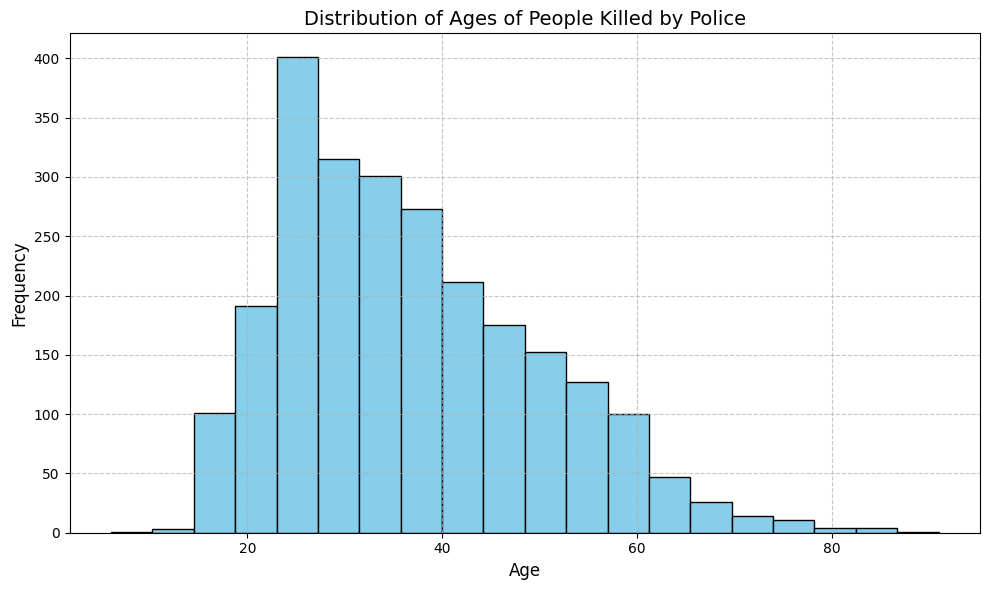

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from the CSV file
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv')

# Check if 'age' column exists and convert it to numeric (in case of invalid data)
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

# Drop rows where the age is NaN (invalid or missing)
df_fatalities_clean = df_fatalities.dropna(subset=['age'])

# Calculate basic statistics for age
min_age = df_fatalities_clean['age'].min()
max_age = df_fatalities_clean['age'].max()
mean_age = df_fatalities_clean['age'].mean()
median_age = df_fatalities_clean['age'].median()

# Print the statistics
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")

# Plot the distribution of ages
plt.figure(figsize=(10, 6))
plt.hist(df_fatalities_clean['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages of People Killed by Police', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [53]:
import pandas as pd

df_fatalities = pd.read_csv('Deaths_by_Police_US.csv')

df_fatalities['signs_of_mental_illness'] = df_fatalities['signs_of_mental_illness'].apply(lambda x: str(x).strip().lower() == 'true')

total_fatalities = len(df_fatalities)
mental_illness_count = df_fatalities['signs_of_mental_illness'].sum()

mental_illness_percentage = (mental_illness_count / total_fatalities) * 100

print(f"Percentage of people killed by police with a diagnosed mental illness: {mental_illness_percentage:.2f}%")


Percentage of people killed by police with a diagnosed mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

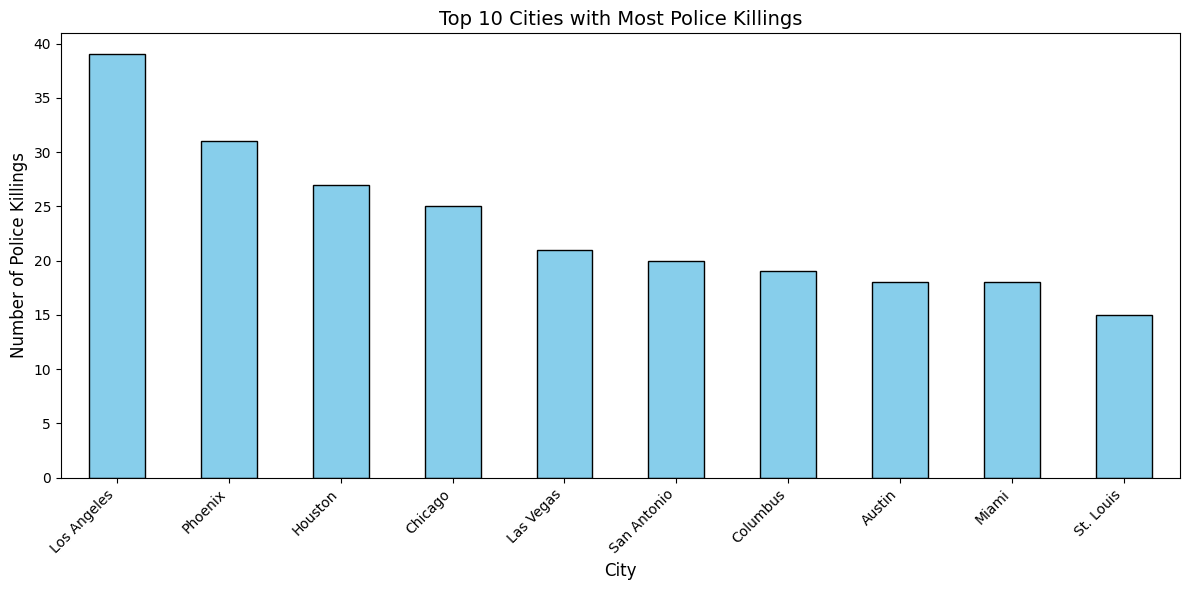

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df_fatalities = pd.read_csv('Deaths_by_Police_US.csv')

city_counts = df_fatalities['city'].value_counts().head(10)

plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Cities with Most Police Killings', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Police Killings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [55]:
import pandas as pd

df_fatalities = pd.read_csv('Deaths_by_Police_US.csv')

top_10_cities = df_fatalities['city'].value_counts().head(10).index

df_top_10_cities = df_fatalities[df_fatalities['city'].isin(top_10_cities)]

death_by_race_city = df_top_10_cities.groupby(['city', 'race']).size().unstack(fill_value=0)

total_deaths_per_city = df_top_10_cities['city'].value_counts()

death_rate_by_race = death_by_race_city.div(total_deaths_per_city, axis=0) * 100

print(death_rate_by_race)


race           A     B     H    N    O     W
city                                        
Austin      0.00 16.67 11.11 0.00 0.00 72.22
Chicago     0.00 84.00  4.00 0.00 0.00  8.00
Columbus    0.00 57.89  0.00 0.00 5.26 31.58
Houston     3.70 55.56 22.22 3.70 0.00 11.11
Las Vegas   0.00 14.29 23.81 0.00 0.00 42.86
Los Angeles 2.56 25.64 48.72 0.00 0.00 15.38
Miami       0.00 44.44 33.33 0.00 0.00 16.67
Phoenix     0.00  6.45 35.48 9.68 0.00 38.71
San Antonio 0.00 15.00 60.00 0.00 0.00 15.00
St. Louis   0.00 73.33  0.00 0.00 0.00 20.00


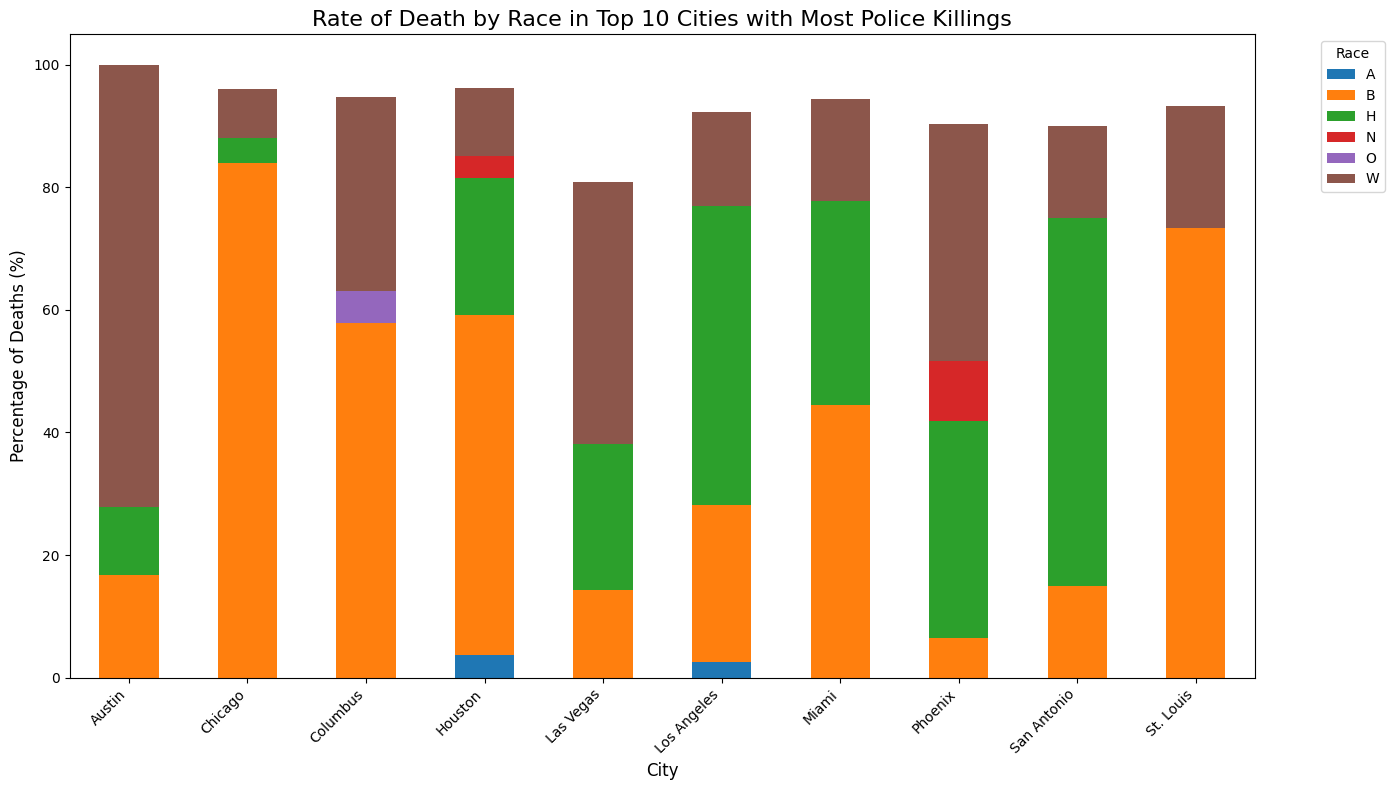

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df_fatalities = pd.read_csv('Deaths_by_Police_US.csv')

top_10_cities = df_fatalities['city'].value_counts().head(10).index

df_top_10_cities = df_fatalities[df_fatalities['city'].isin(top_10_cities)]

death_by_race_city = df_top_10_cities.groupby(['city', 'race']).size().unstack(fill_value=0)

total_deaths_per_city = df_top_10_cities['city'].value_counts()

death_rate_by_race = death_by_race_city.div(total_deaths_per_city, axis=0) * 100

death_rate_by_race.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Rate of Death by Race in Top 10 Cities with Most Police Killings', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Percentage of Deaths (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [63]:
%pip install --upgrade geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 169.5 kB/s eta 0:01:33
   - -------------------------------------- 0.5/16.2 MB 169.5 kB/s eta 0:01:33
   - -------------------------------------- 0.5/16.2 MB 169.5 kB/s eta 0:01:33
   - -------------------------------------- 0.5/16.2 MB 169.5 kB/s eta 0:01:33
   - -------------------------------------- 0.5/16.2 M

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

C:\Users\hp\AppData\Local\Temp\ipykernel_8536\3848796048.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



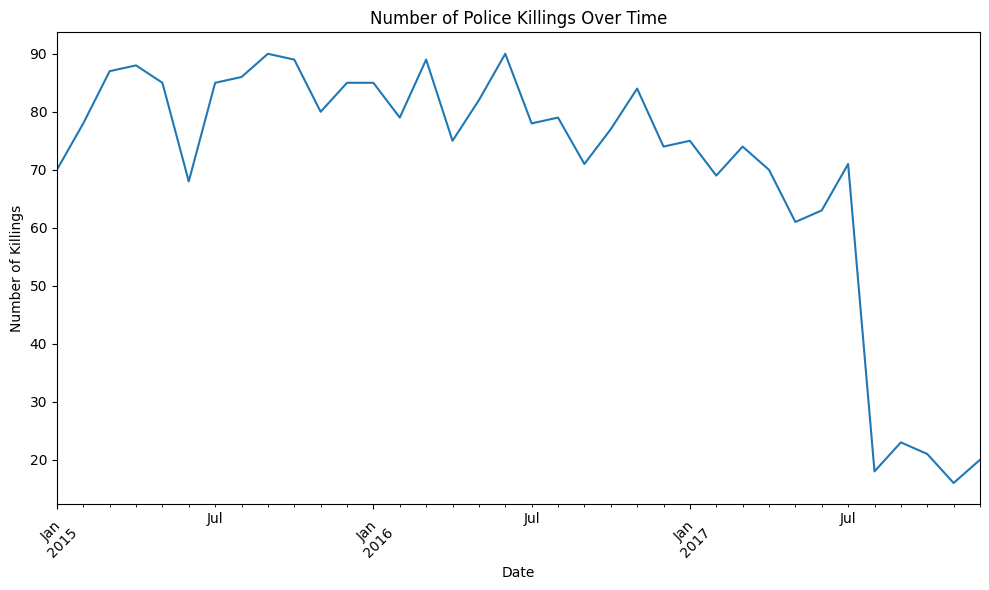

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Deaths_by_Police_US.csv')

# Convert the 'date' column to datetime format, letting pandas infer the format and handling errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if there are any rows where the date conversion failed
if df['date'].isna().any():
    print("Rows with invalid dates:")
    print(df[df['date'].isna()])

# Aggregate the data by month (or year)
df['year_month'] = df['date'].dt.to_period('M')
killings_per_month = df.groupby('year_month').size()

# Plot the trend
plt.figure(figsize=(10,6))
killings_per_month.plot(kind='line')
plt.title('Number of Police Killings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).